# Linear Regression

LR is a regression technique in which the independent variable (x) has a 'LINEAR' relationship with the dependent variable.
Straight line drawn is the "BEST FIT LINE".

COST FUNCTION: 
y = b0 + b1x + e

y - dependent variable 
b0 - y intercept
b1 - slope
x - independent variable 
e - error

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Array Declaration

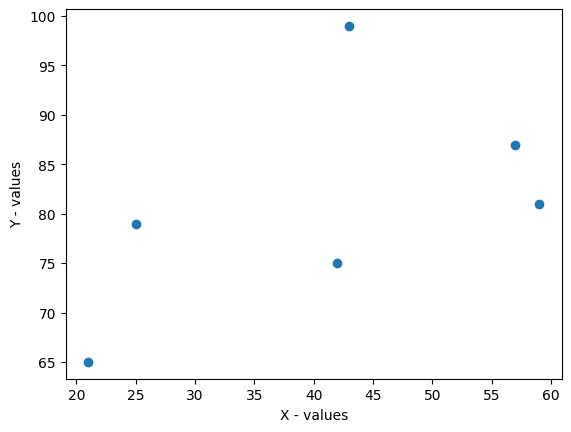

In [54]:
x = np.array([43, 21, 25, 42, 57, 59])
y = np.array([99, 65, 79, 75, 87, 81])

plt.scatter(x, y)
plt.xlabel("X - values")
plt.ylabel("Y - values")
plt.show()

Finding b0 and b1: Slope & Interrcept

In [55]:
x2 = np.square(x)
sx2 = np.sum(x2)
sx = np.sum(x)
sy = np.sum(y)
xy = np.multiply(x, y)
sxy = np.sum(xy)
n = np.size(x)

b0 = (sy * sx2 - sx * sxy) / (n * sx2 - sx ** 2)
b1 = (n * sxy - sx * sy) / (n * sx2 - sx ** 2)
print("b0 = ",b0)
print("b1 = ",b1)

b0 =  65.1415715245131
b1 =  0.3852249832102082


Prediction using the found model

In [56]:
def lin_reg(X):
    Yp = b0 + b1 * X
    return Yp

X = int(input("Enter a value for X: "))
print("Predicted Y = ",lin_reg(X))

Predicted Y =  86.32894560107455


Finding the R square to check the goodness of fit

In [57]:
Yp = np.array([])

for i in x:
    Yp = np.append(Yp, lin_reg(i))

ymean = np.mean(y)

def Yp_ymean(Yp, ymean):
    ypy = Yp - ymean
    return ypy

ypy = np.array([])
for i in Yp:
    ypy = np.append(ypy, Yp_ymean(i, ymean))

def Y_ymean(y, ymean):
    yy = y - ymean
    return yy

yy = np.array([])
for i in y:
    yy = np.append(yy, Y_ymean(i, ymean))

yy2 = np.square(yy)
ypy2 = np.square(ypy)

R2 = np.sum(ypy2) / np.sum(yy2)
print("R Square = ", format(R2, '.3f')) 

R Square =  0.281


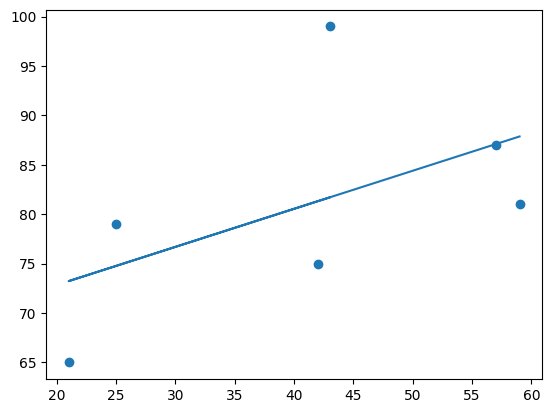

In [58]:
plt.scatter(x, y)
plt.plot(x, Yp)

## Linear Regression using Gradient Descent Approach

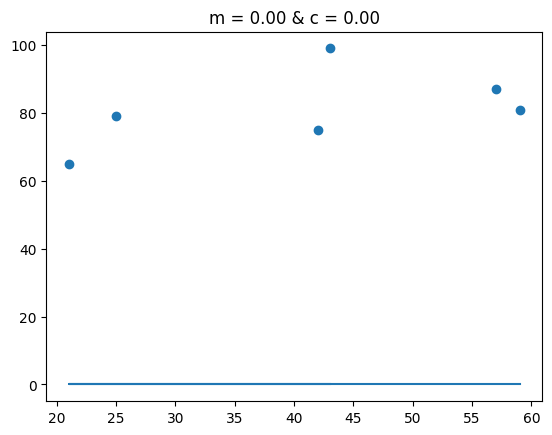

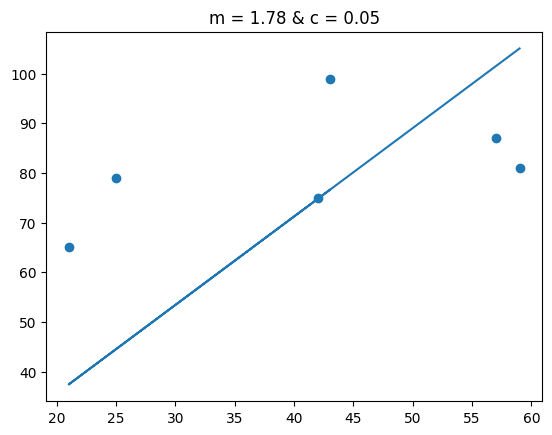

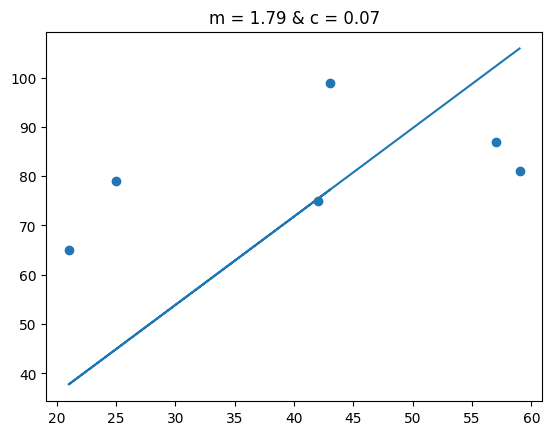

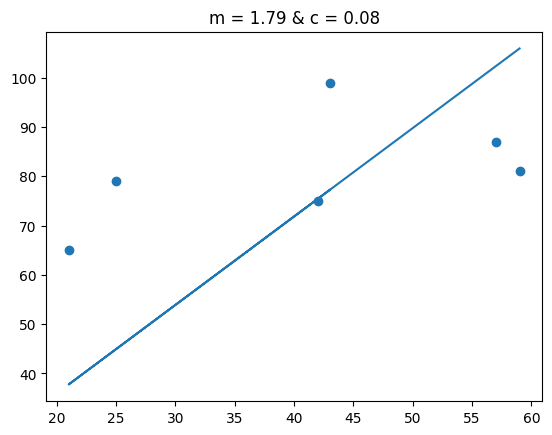

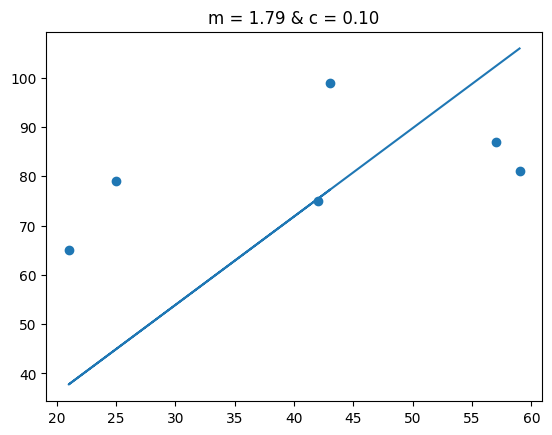

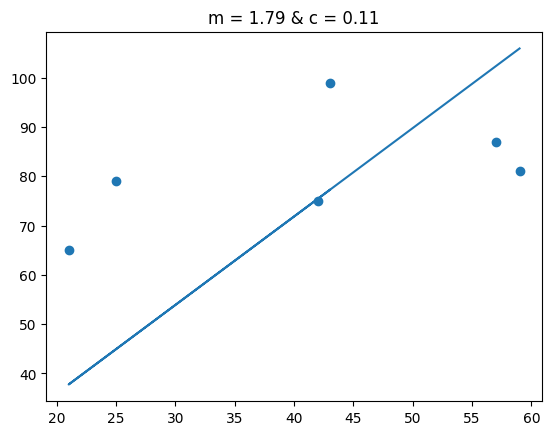

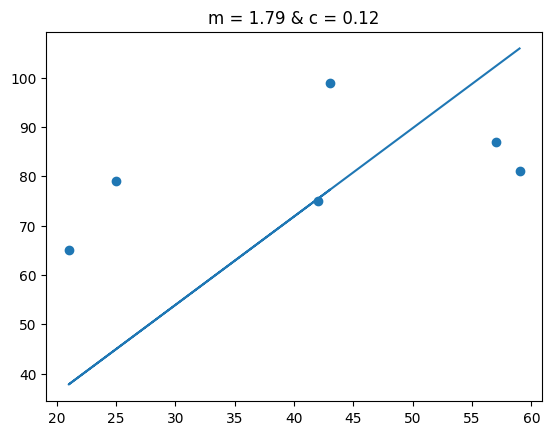

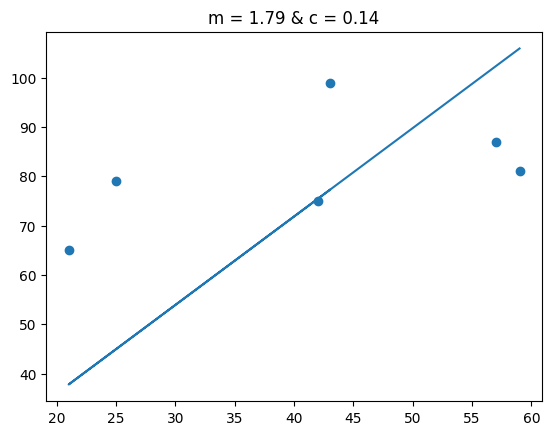

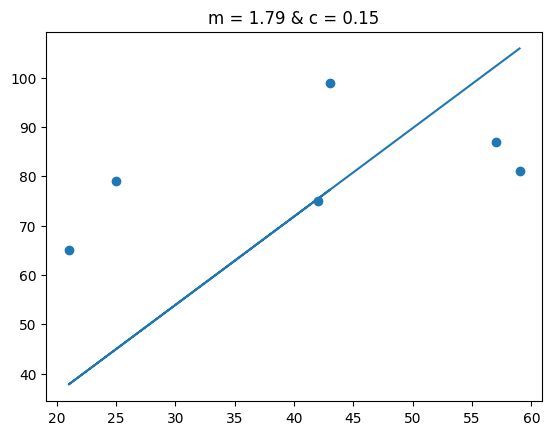

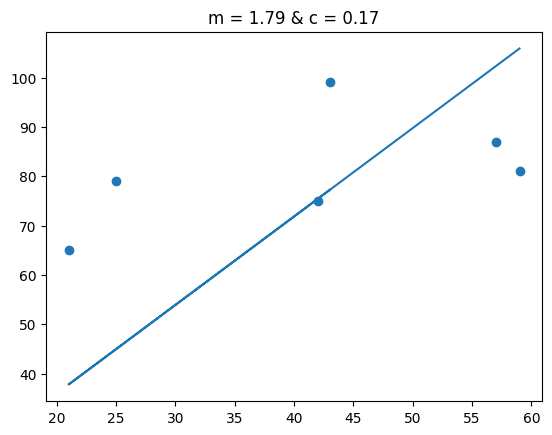

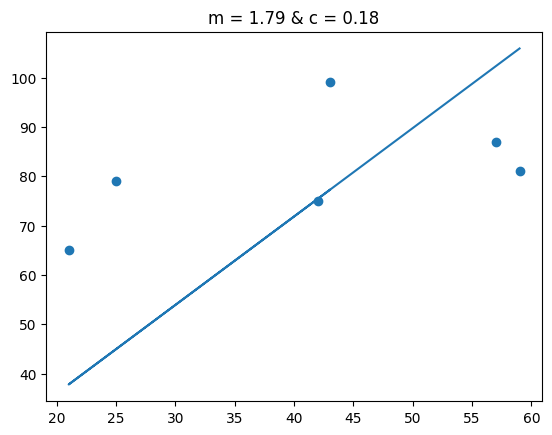

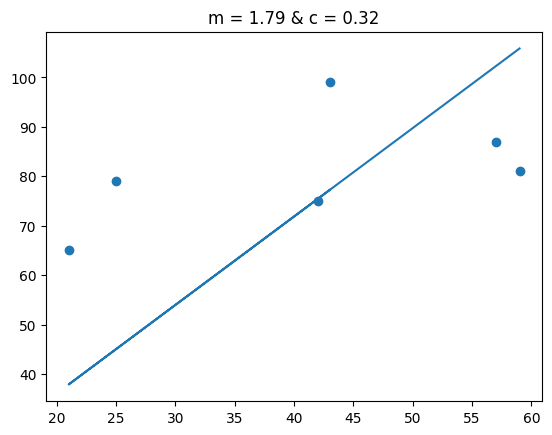

m =  1.7886357966410513
c =  0.3213342906975659


In [59]:
m = 0
c = 0

L = 0.0001
epochs = 200

#Iterating through the for loop to find the slope with minimum error
for i in range(epochs):
    Y_pred = m*x + c

    if i in [0, 10, 20, 30, 40, 50, 60, 70, 80, 90] or (i+1) % 100 == 0:
        plt.scatter(x, y)
        plt.plot(x, Y_pred)
        plt.title("m = {:.2f} & c = {:.2f}".format(m,c,))
        plt.show()
    D_m = (-2/n) * sum( x * (y - Y_pred)) #Partial derivative of loss function w.r.t m
    D_c = (-2/n) * sum( y - Y_pred) #Partial derivative of loss function w.r.t c 
    m = m - L * D_m
    c = c - L*D_c

print("m = ",m)
print("c = ",c)

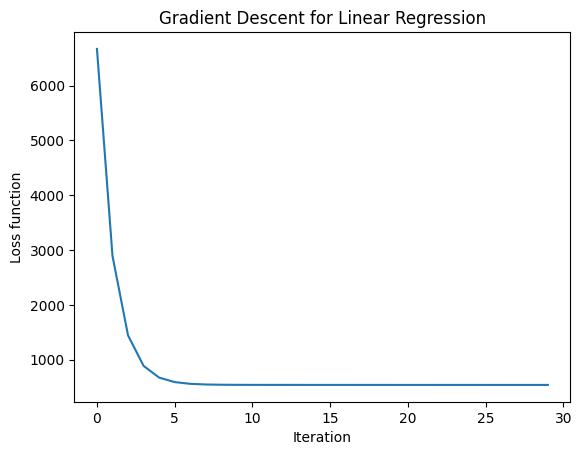

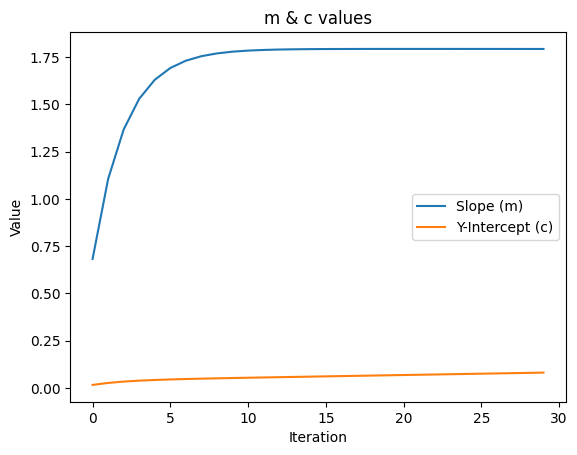

In [61]:
epochs = 30
learning_rate = 0.0001

# Initialize m and c
m = 0  # slope
c = 0  # y-intercept

# Lists to store the values for plotting
loss_values = []  # Loss values at each iteration
m_values = []  # m values at each iteration
c_values = []  # c values at each iteration

# Perform gradient descent
n = len(x)
for i in range(epochs):
    # Calculate the predicted values
    Y_pred = [(m * xi + c) for xi in x]

    # Calculate the loss
    loss = (1 / n) * sum((yi - Y_pred[i]) ** 2 for i, yi in enumerate(y))
    loss_values.append(loss)

    # Calculate the partial derivatives
    D_m = (-2 / n) * sum(x[i] * (y[i] - Y_pred[i]) for i in range(n))
    D_c = (-2 / n) * sum(y[i] - Y_pred[i] for i in range(n))

    m = m - learning_rate * D_m
    c = c - learning_rate * D_c

    m_values.append(m)
    c_values.append(c)

# Plot the loss curve
plt.plot(range(epochs), loss_values)
plt.xlabel("Iteration")
plt.ylabel("Loss function")
plt.title("Gradient Descent for Linear Regression")
plt.show()

# Plot the changes in m and c over iterations
plt.plot(range(epochs), m_values, label="Slope (m)")
plt.plot(range(epochs), c_values, label="Y-Intercept (c)")
plt.xlabel("Iteration")
plt.ylabel("Value")
plt.title("m & c values")
plt.legend()
plt.show()
